# Quarterback Game Logs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/raw/Game_Logs_Quarterback.csv')

In [3]:
df.head()

,Player Id,Name,Position,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,...,Ints,Sacks,Sacked Yards Lost,Passer Rating,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost
0,jaredzabransky/2495791,"Zabransky, Jared",NaN,2007,Preseason,1,08/11,Home,CHI,L,...,--,--,--,0.0,--,--,--,--,--,--
1,jaredzabransky/2495791,"Zabransky, Jared",NaN,2007,Preseason,2,08/18,Away,ARI,W,...,0,0,0,46.9,--,--,--,--,--,--
2,jaredzabransky/2495791,"Zabransky, Jared",NaN,2007,Preseason,3,08/25,Home,DAL,W,...,--,--,--,0.0,--,--,--,--,--,--
3,jaredzabransky/2495791,"Zabransky, Jared",NaN,2007,Preseason,4,08/30,Away,TB,L,...,1,2,13,50.8,2,17,8.5,0,--,--
4,billdemory/2512778,"Demory, Bill",NaN,1974,Regular Season,1,09/15,Away,KC,L,...,--,--,--,0.0,--,--,--,--,--,--


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40247 entries, 0 to 40246
Data columns (total 29 columns):
Player Id                    40247 non-null object
Name                         40247 non-null object
Position                     10094 non-null object
Year                         40247 non-null int64
Season                       40247 non-null object
Week                         40247 non-null int64
Game Date                    40247 non-null object
Home or Away                 40247 non-null object
Opponent                     40247 non-null object
Outcome                      40247 non-null object
Score                        40247 non-null object
Games Played                 40247 non-null int64
Games Started                40247 non-null object
Passes Completed             40247 non-null object
Passes Attempted             40247 non-null object
Completion Percentage        40247 non-null object
Passing Yards                40247 non-null object
Passing Yards Per Attempt  

In [5]:
def norm_cols(cols):
    '''
    converts column naming to traditional database-stle naming convention
    '''
    
    cols = cols.str.replace(' ','_').str.replace('(','').str.replace(')','').str.lower()
    return cols

In [6]:
# apply column renaming to dataframe
df.columns = norm_cols(df.columns)
df.columns

Index(['player_id', 'name', 'position', 'year', 'season', 'week', 'game_date',
       'home_or_away', 'opponent', 'outcome', 'score', 'games_played',
       'games_started', 'passes_completed', 'passes_attempted',
       'completion_percentage', 'passing_yards', 'passing_yards_per_attempt',
       'td_passes', 'ints', 'sacks', 'sacked_yards_lost', 'passer_rating',
       'rushing_attempts', 'rushing_yards', 'yards_per_carry', 'rushing_tds',
       'fumbles', 'fumbles_lost'],
      dtype='object')

In [7]:
df['game_date'].head()

0    08/11
1    08/18
2    08/25
3    08/30
4    09/15
Name: game_date, dtype: object

In [8]:
#df['game_date'] = pd.to_datetime(df['game_date'])
df['month'],df['day'] = df['game_date'].str.split('/',1).str
df['game_datetime'] = pd.to_datetime(df[['year','month','day']],format='%Y%M%d')

In [9]:
df.replace({'--': 0},inplace=True)

In [10]:
df['passing_yards'] = df['passing_yards'].astype('float')

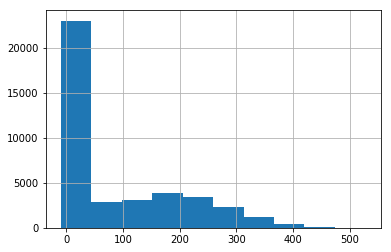

In [11]:
df['passing_yards'].hist()

In [13]:
# split score
df['score'].head()

0    19 to 20
1    33 to 20
2    28 to 16
3    24 to 31
4    16 to 24
Name: score, dtype: object

In [14]:
cols = ['games_played','games_started', 'passes_completed', 'passes_attempted',
       'completion_percentage', 'passing_yards', 'passing_yards_per_attempt',
       'td_passes', 'ints', 'sacks', 'sacked_yards_lost', 'passer_rating',
       'rushing_attempts', 'rushing_yards', 'yards_per_carry', 'rushing_tds',
       'fumbles', 'fumbles_lost']

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40247 entries, 0 to 40246
Data columns (total 32 columns):
player_id                    40247 non-null object
name                         40247 non-null object
position                     10094 non-null object
year                         40247 non-null int64
season                       40247 non-null object
week                         40247 non-null int64
game_date                    40247 non-null object
home_or_away                 40247 non-null object
opponent                     40247 non-null object
outcome                      40247 non-null object
score                        40247 non-null object
games_played                 40247 non-null float64
games_started                40247 non-null float64
passes_completed             40247 non-null float64
passes_attempted             40247 non-null float64
completion_percentage        40247 non-null float64
passing_yards                40247 non-null float64
passing_yards_per_at

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,40247.0,1998.022039,13.461214,1970.0,1987.0,2001.0,2010.0,2016.0
week,40247.0,8.637240,5.349319,0.0,4.0,8.0,13.0,23.0
games_played,40247.0,0.571148,0.494918,0.0,0.0,1.0,1.0,1.0
games_started,40247.0,0.260318,0.438813,0.0,0.0,0.0,1.0,1.0
passes_completed,40247.0,7.077099,9.181316,0.0,0.0,0.0,14.0,43.0
passes_attempted,40247.0,12.096280,15.147308,0.0,0.0,0.0,25.0,69.0
completion_percentage,40247.0,28.691858,31.081273,0.0,0.0,0.0,58.3,100.0
passing_yards,40247.0,83.870301,110.406555,-9.0,0.0,0.0,169.0,527.0
passing_yards_per_attempt,40247.0,3.434621,4.203765,-8.0,0.0,0.0,6.7,89.0
td_passes,40247.0,0.500981,0.910082,0.0,0.0,0.0,1.0,7.0


In [20]:
mask = (df['name'] == 'Brady, Tom') & (df['season'] != 'Preseason')
df[mask].describe().T

,count,mean,std,min,25%,50%,75%,max
year,298.0,2008.013423,4.958395,2000.0,2004.00,2007.50,2012.000,2016.0
week,298.0,10.788591,6.072980,1.0,6.00,11.00,16.000,22.0
games_played,298.0,0.916107,0.277693,0.0,1.00,1.00,1.000,1.0
games_started,298.0,0.902685,0.296885,0.0,1.00,1.00,1.000,1.0
passes_completed,298.0,20.406040,9.066509,0.0,16.00,22.00,26.000,43.0
passes_attempted,298.0,32.090604,13.664394,0.0,27.00,34.00,40.000,65.0
completion_percentage,298.0,58.016443,19.802505,0.0,54.80,62.25,68.375,92.9
passing_yards,298.0,237.402685,109.379543,0.0,185.25,251.00,314.250,517.0
passing_yards_per_attempt,298.0,6.803020,2.742340,0.0,5.80,7.00,8.300,14.2
td_passes,298.0,1.741611,1.322053,0.0,1.00,2.00,3.000,6.0


In [21]:
mask = (df['name'] == 'Rodgers, Aaron') & (df['season'] != 'Preseason')
df[mask].describe().T

,count,mean,std,min,25%,50%,75%,max
year,209.0,2010.803828,3.381907,2005.0,2008.0,2011.0,2014.0,2016.0
week,209.0,10.110048,5.760638,1.0,5.0,10.0,15.0,22.0
games_played,209.0,0.770335,0.421627,0.0,1.0,1.0,1.0,1.0
games_started,209.0,0.732057,0.443951,0.0,0.0,1.0,1.0,1.0
passes_completed,209.0,16.459330,10.825518,0.0,2.0,19.0,25.0,39.0
passes_attempted,209.0,25.301435,16.441038,0.0,2.0,30.0,38.0,61.0
completion_percentage,209.0,49.963158,29.432413,0.0,44.1,62.1,69.4,100.0
passing_yards,209.0,199.153110,133.555432,0.0,17.0,236.0,302.0,480.0
passing_yards_per_attempt,209.0,6.021531,3.800426,0.0,3.5,7.0,8.8,13.5
td_passes,209.0,1.612440,1.443832,0.0,0.0,2.0,3.0,6.0
